

## Back-stepping Prescribed-Time Sliding Mode Control of a Quadrotor UAV

This Python code that implements a hybrid control strategy for a quadrotor UAV, combining Back-stepping Prescribed-Time Control (PTC) and Sliding Mode Control (SMC). The aim is to achieve precise trajectory tracking within a user-defined preset time, while also demonstrating robustness against variations in initial conditions. This implementation is based on the research presented in the paper "Back-stepping Prescribed-Time Sliding Mode Control of a Quadrotor UAV" by Roozbeh Badiei, Mohammad Bagher Sajjadi, Amir Hossein Davaie-Markazi, and Moosa Ayati. The paper was presented at the 2024 12th RSI International Conference on Robotics and Mechatronics (ICROM) with DOI: 10.1109/ICROM64545.2024.10903605.

### Controller Design

The control strategy presented in the paper and implemented in this code integrates two main control techniques:

1.  **Back-stepping Prescribed-Time Control (PTC)**: This method ensures that the trajectory tracking errors converge to zero within a user-defined finite time, regardless of the initial conditions. This is achieved by designing a control law that drives the system states towards the desired trajectory within a predetermined time period $t_p$.

    The core idea of prescribed-time stability is outlined in Definition 2 of the paper. It states that a system is prescribed-time stable if it is finite-time stable and there exists a predetermined time $t_p' = t_p + t_0$ (where $t_p$ is the user-defined target time and $t_0$ is the initial time) that does not depend on the system's initial conditions, within which the system's state converges.

    The Back-stepping approach formulates the control by defining error variables for each state. The error variables are defined as:
    $$
    \begin{aligned}
    e_{2i-1} &= x_{2i-1}(t) - x_{d(2i-1)}(t) \\
    e_{2i} &= x_{2i}(t) - \dot{x}_{d(2i-1)}(t) - \alpha_{i}(t)
    \end{aligned}
    $$
    where $i$ is an index from 1 to 6, and $\alpha_i(t)$ are virtual signals.
    The virtual control signals $\alpha_i(t)$ are defined as mentioned in equation (31) in the paper:
    $$
    \alpha_{i}=-\gamma_{2i-1}\frac{e_{2i-1}}{t_{p}+t_{0}-t}
    $$
    where $\gamma_{2i-1}$ are proportional gain coefficients, and $e_{2i-1}$ are the tracking errors.

    For $t < t_p$, the control laws for rotational and translational movements are given by equations (32) to (37) in the paper:
    $$
    \begin{aligned}
    U_{2} &= \frac{1}{b_{1}}[-e_{1}(t)-\gamma_{2}(\frac{e_{2}(t)}{t_{p}+t_{0}-t})+\dot{\alpha}_{1}(t)+\dot{x}_{1d}-f_{1}(x,t)] \\
    U_{3} &= \frac{1}{b_{2}}[-e_{3}(t)-\gamma_{4}(\frac{e_{4}(t)}{t_{p}+t_{0}-t})+\dot{\alpha}_{2}(t)+\dot{x}_{3d}-f_{2}(x,t)] \\
    U_{4} &= \frac{1}{b_{3}}[-e_{5}(t)-\gamma_{6}(\frac{e_{6}(t)}{t_{p}+t_{0}-t})+\dot{\alpha}_{3}(t)+\dot{x}_{5d}-f_{3}(x,t)] \\
    v_{x} &= -e_{7}(t)-\gamma_{8}(\frac{e_{8}(t)}{t_{p}+t_{0}-t})+\dot{\alpha}_{4}(t)+\dot{x}_{7d}-f_{4}(x,t) \\
    v_{y} &= -e_{9}(t)-\gamma_{10}(\frac{e_{10}(t)}{t_{p}+t_{0}-t})+\dot{\alpha}_{5}(t)+\dot{x}_{9d}-f_{5}(x,t) \\
    v_{z} &= -e_{11}(t)-\gamma_{12}(\frac{e_{12}(t)}{t_{p}+t_{0}-t})+\dot{\alpha}_{6}(t)+\dot{x}_{11d}-f_{6}(x,t)
    \end{aligned}
    $$
    These laws are derived using a Lyapunov function candidate $V(x) = \sum_{i=1}^{12}\frac{1}{2}e_{i}^{2}$. The derivative of the Lyapunov function is shown to satisfy:
    $$
    \dot{V}=\sum_{i=1}^{12}-\gamma_{i}\frac{e_{i}^{2}}{t_{p}+t_{0}-t}\le\gamma\frac{V}{t_{p}+t_{0}-t}
    $$
    where $\gamma=\min_{i\in\{1,2,...,12\}}\gamma_{i}$. This guarantees prescribed-time stability as per Lemma 1 in the paper.

2.  **Sliding Mode Control (SMC)**: After the prescribed time $t_p$, the control switches to a Sliding Mode Control (SMC) to maintain the tracking errors at zero and ensure the stability and robustness of the closed-loop system. SMC is a robust nonlinear control technique that forces the system's trajectories onto a predefined stable "sliding surface" in the state space.

    The sliding surface $s_i(x)$ is defined as mentioned in equation (26) in the paper:
    $$
    s_{i}(x)=\dot{E}_{i}+\lambda_{i}E_{i}
    $$
    where $E_i = x_i - x_{d_i}$ is the tracking error, $\dot{E}_i$ is the derivative of the error, and $\lambda_i$ are positive constants. The control objective of SMC is to bring the error $E_i$ to zero. The switching control law is given by equation (28) in the paper:
    $$
    u_{sw}=K_{i}\text{sign}(s_{i})
    $$
    Where $K_i$ are positive switching constants. For $t \ge t_p$, the control laws for rotational and translational motion are defined by equations (41) to (46) in the paper:
    $$
    \begin{aligned}
    U_{2} &= -\frac{1}{b_{1}}(\lambda_{1}(x_{2}-x_{2d})-\dot{x}_{2}+f_{1}(x,t)+K_{1}\text{sign}(s_{1})) \\
    U_{3} &= -\frac{1}{b_{2}}(\lambda_{3}(x_{4}-x_{4d})-\dot{x}_{4}+f_{2}(x,t)+K_{3}\text{sign}(s_{3})) \\
    U_{4} &= -\frac{1}{b_{3}}(\lambda_{5}(x_{6}-x_{6d})-\dot{x}_{6}+f_{1}(x,t)+K_{5}\text{sign}(s_{5})) \\
    v_{x} &= -(\lambda_{7}(x_{8}-x_{8d})-\dot{x}_{8}+f_{4}+K_{7}\text{sign}(s_{7})) \\
    v_{y} &= -(\lambda_{9}(x_{10}-x_{10d})-\dot{x}_{10}+f_{5}+K_{9}\text{sign}(s_{9})) \\
    v_{z} &= -(\lambda_{11}(x_{12}-x_{12d})-\dot{x}_{12}+f_{6}+K_{11}\text{sign}(s_{11}))
    \end{aligned}
    $$
    The stability of the SMC part is proven using a Lyapunov function $V_{smc}=\sum_{i=1}^{6}\frac{1}{2}s_{2i-1}^{2}$. The derivative of this Lyapunov function, as shown in equation (48) in the paper:
    $$
    \dot{V}_{smc}(x)=\sum_{i=1}^{6}s_{2i-1}\dot{s}_{2i-1}= \sum_{i=1}^{6}-K_{2i-1}|s_{2i-1}|\le0
    $$
    guarantees the stability of the error dynamics.

The combined control scheme is illustrated in Figure 1 of the paper, showing how the desired angles and total thrust are obtained and applied to the quadrotor dynamics.

The quadrotor's dynamic model, as mentioned in equation (1) in the paper, is represented by a set of equations incorporating translational and rotational motion. The state vector is $\vec{x}=[\phi,\dot{\phi},\theta,\dot{\theta},\psi,\dot{\psi},x,\dot{x},y,\dot{y},z,\dot{z}]\in\mathbb{R}^{12}$.

### Code Structure

The Python code provided simulates the quadrotor's behavior under this hybrid control strategy.

#### Constants

The code begins by defining physical constants for the quadrotor, such as L (half-length), m (mass), g (gravity), and moments of inertia (Ix, Iy, Iz), as well as drag coefficients (b, d, Kf, Kt). These are crucial for accurate dynamic modeling of the UAV.

#### BackSteppingControl(t, tp, t0, wStar, x, XD, xDoubleDotD, FHAT_ST, gammaCtrl)

This function implements the Back-stepping Prescribed-Time Control logic.

* **Inputs**:
    * t: Current time.
    * tp: Prescribed time for convergence.
    * t0: Initial time.
    * wStar: Angular disturbance from propellers ($\Omega^*$).
    * x: Current state vector of the quadrotor.
    * XD: Desired state vector.
    * xDoubleDotD: Second derivative of the desired state vector.
    * FHAT_ST: Estimated fault/disturbance terms (not used).
    * gammaCtrl: Array of proportional gain coefficients ($\gamma_i$) (not used).

* **Outputs**:
    * u: Calculated control inputs (thrust and torques).
    * e: Tracking errors.

#### PIDController(x, xOld, xd, xdOld, Ts, INTEGRALOLD, Kp, Kd, Ki)

This function, although present in the provided Python code, is explicitly stated in the paper as being used for *comparison* with the proposed control strategy, highlighting the superior performance of the PTC. It's a standard PID implementation for position and attitude control.

* **Inputs**: Current and old state vectors, desired current and old state vectors, sampling time, old integral terms, and PID gains (Kp, Kd, Ki).
* **Outputs**: Control inputs, total thrust, new integral terms, and new error terms.

#### SlidingModeControl(t, tp, t0, wStar, x, XD, xDoubleDotD, FHAT_ST, gammaCtrl)
This function implements the Sliding Mode Control (SMC) logic.
* **Inputs**:
    * t: Current time.
    * tp: Prescribed time for convergence.
    * t0: Initial time.
    * wStar: Angular disturbance from propellers ($\Omega^*$).
    * x: Current state vector of the quadrotor.
    * XD: Desired state vector.
    * xDoubleDotD: Second derivative of the desired state vector.
    * FHAT_ST: Estimated fault/disturbance terms.
    * gammaCtrl: Array of proportional gain coefficients ($\gamma_i$) (not used).

* **Outputs**:
    * u: Calculated control inputs (thrust and torques).
    * e: Tracking errors.

#### plotResults(t, x, Xd, u)

This function is a utility for plotting various simulation results to analyze the quadrotor's performance.

* **Plots**:
    * Quadrotor position states (x, y, z) against desired trajectories. This corresponds to the translational subsystem tracking results mentioned in the paper.
    * Quadrotor orientation states (roll $\phi$, pitch $\theta$, yaw $\psi$) against desired trajectories. This corresponds to the rotational subsystem tracking results.
    * 3D trajectory of the quadrotor compared to the desired 3D path.
    * Tracking errors for all states ($\phi, \dot{\phi}, \theta, \dot{\theta}, \psi, \dot{\psi}, x, \dot{x}, y, \dot{y}, z, \dot{z}$). The paper highlights the reduction in overshoots and tracking errors.
    * Control signals $U_3, U_4, U_5, U_6$ (roll, pitch, yaw torques, and vertical thrust equivalent).

#### Rotor2_Dynamic(t, x, u, FAULT_ANGLES)

This function defines the quadrotor's nonlinear dynamics.

* **Inputs**:
    * t: Current time.
    * x: Current state vector.
    * u: Control inputs (from BackSteppingControl or SlidingModeControl).
    * FAULT_ANGLES: Angles related to fault injection (used for disturbance modeling)(not used in this paper ).

* **Outputs**:
    * XDOT: Derivative of the state vector (rates of change for all 12 states).
    * Disturbance: Calculated disturbance forces/torques.
    * wStar: Angular disturbance.
    * W: Individual rotor angular velocities.
    * fPhi, fTheta, fPsi: Terms from angular dynamics.

#### setDesiredTrajectory(t_array, CASE, n=6)

This function generates different desired trajectories for the quadrotor to follow. The paper states that the desired reference signals and their derivatives are assumed to be known, bounded, and piecewise continuous. 

* **Inputs**:
    * t_array: Array of time points.
    * CASE: Integer specifying the trajectory type (1: Linear, 2: Elliptical, 3: BiLinear).
    * n: Number of degrees of freedom.
* **Outputs**:
    * XD: Desired state vector (position, velocity, angles, angular velocities).
    * XDoubleDotD: Second derivative of the desired state vector.

#### SlidingModeControl(x, XD, xDoubleDotd, K, a, fPhi, fTheta, fPsi)

This function implements the Sliding Mode Control (SMC) logic, which is activated after the prescribed time $t_p$.

* **Inputs**:
    * x: Current state vector.
    * XD: Desired state vector.
    * xDoubleDotd: Second derivative of the desired state vector.
    * K: Positive switching constants for SMC.
    * a: Coefficients for the sliding surface (lambda in the paper).
    * fPhi, fTheta, fPsi: Terms from angular dynamics.

* **Outputs**:
    * u: Calculated control inputs.
    * e: Tracking errors.

#### stateCalculation(K1RK, xOld, uold, Ts, tOld, FAULT_ANGLES)

This function performs a single step of the Runge-Kutta 4th order numerical integration method to update the quadrotor's state.

* **Inputs**:
    * K1RK: First Runge-Kutta coefficient (result of Rotor2_Dynamic).
    * xOld: Previous state vector.
    * uold: Control input at the previous time step.
    * Ts: Sampling time.
    * tOld: Previous time.
    * FAULT_ANGLES: Fault injection angles.
* **Calculations**: Computes K2, K3, K4 coefficients by evaluating Rotor2_Dynamic at intermediate points and then calculates the new state Q using the weighted average of these coefficients.
* **Outputs**:
    * Q: New state vector.

#### main()

This is the main simulation loop that orchestrates the entire process.

* **Initialization**: Sets up simulation parameters (time step Ts, max time tMax, prescribed time tp), initial conditions x0, and initializes arrays for states x, errors e, control signals u, and fault estimations.
* **Parameter Setup**: Defines gammaCtrl for Back-stepping parameters (e.g., $\gamma_1=\gamma_2=\gamma_3=\gamma_4=\gamma_5=\gamma_6=1.2$ as used in simulations) and K, a for SMC parameters ($\lambda_i=20$ and $K_i=50$ for $i=1,3,5,7,9,11$ as used in simulations).
* **Desired Trajectory**: Calls setDesiredTrajectory to generate the reference path for the quadrotor based on the chosen CASE.
* **Simulation Loop**: Iterates through time, performing the following steps at each time point:
    * Calculates the quadrotor dynamics and actual disturbances using Rotor2_Dynamic.
    * Updates the quadrotor's state using stateCalculation (Runge-Kutta 4th order).
    * Dynamically updates desired roll (phid_val) and pitch (thetad_val) angles based on the current control inputs (virtual control design). This is a crucial step in the decoupling of translational and rotational dynamics.
    * Applies either BackSteppingControl (for $t < t_p$) or SlidingModeControl (for $t \ge t_p$) to calculate the control signals u. This implements the hybrid control strategy.
* **Results**: After the simulation, it calls plotResults to visualize the quadrotor's performance.

Starting simulation...
Simulation finished in 1.20 seconds.


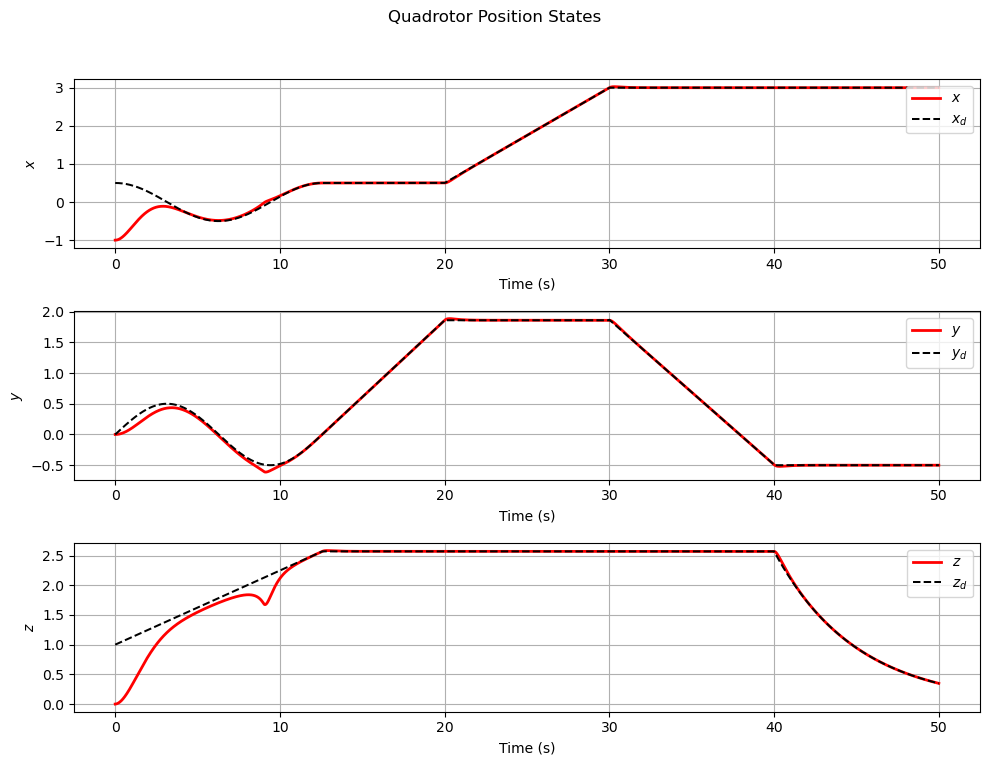

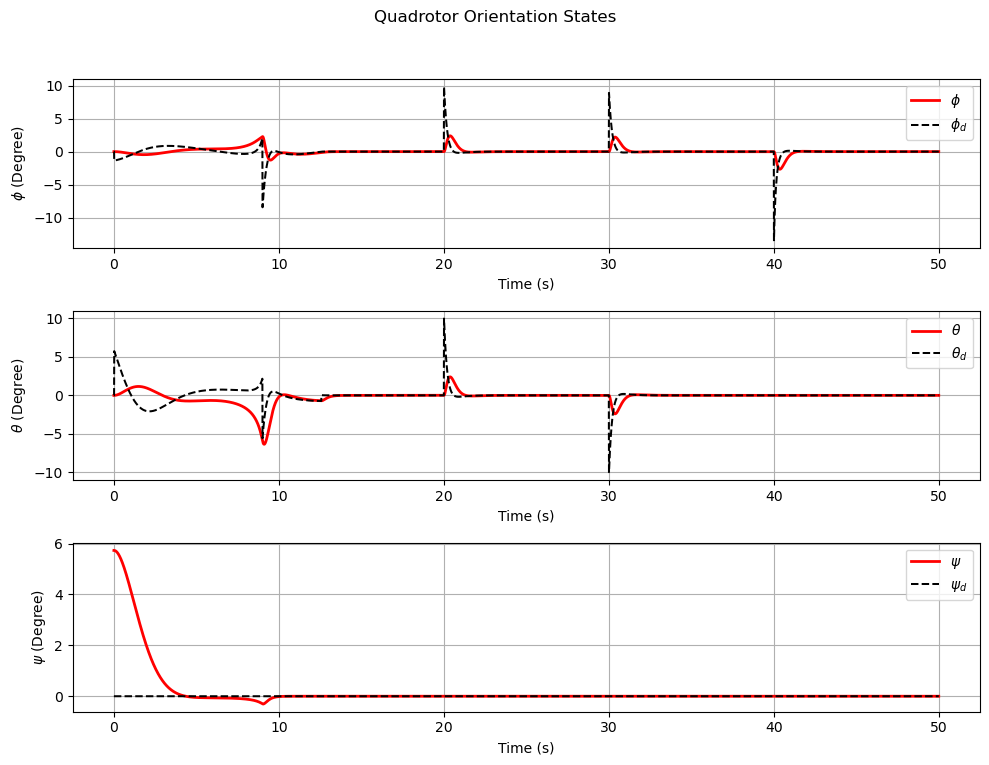

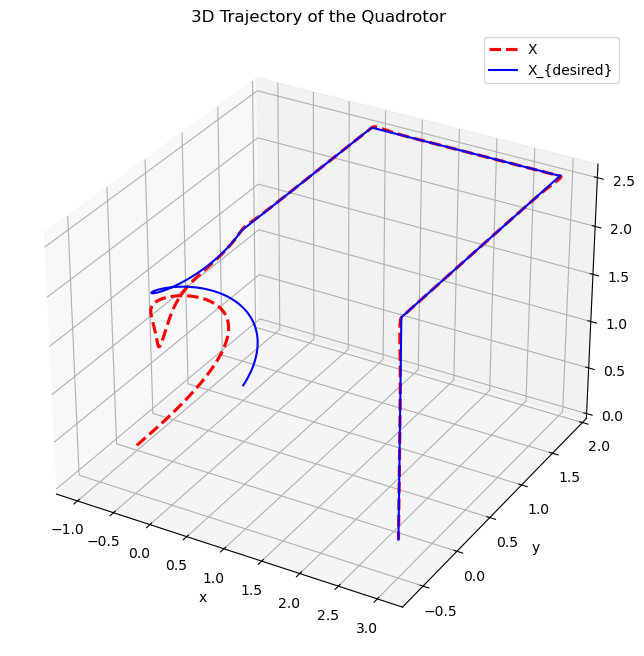

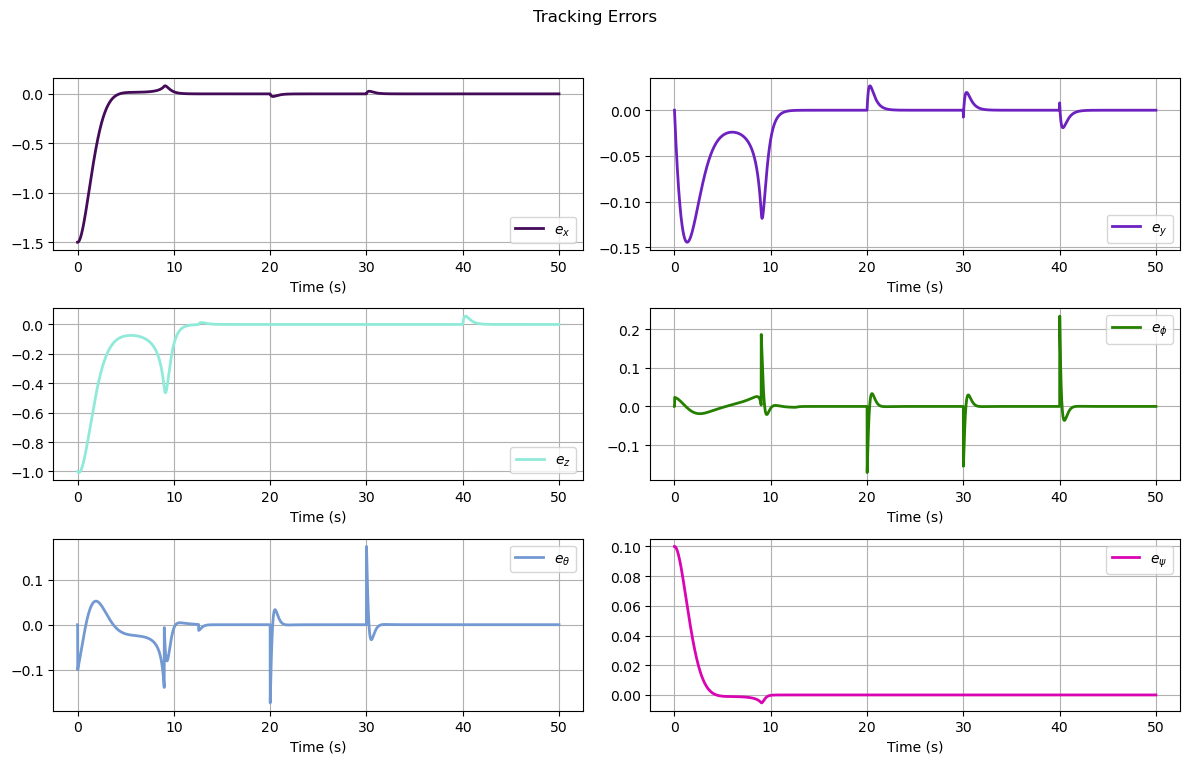

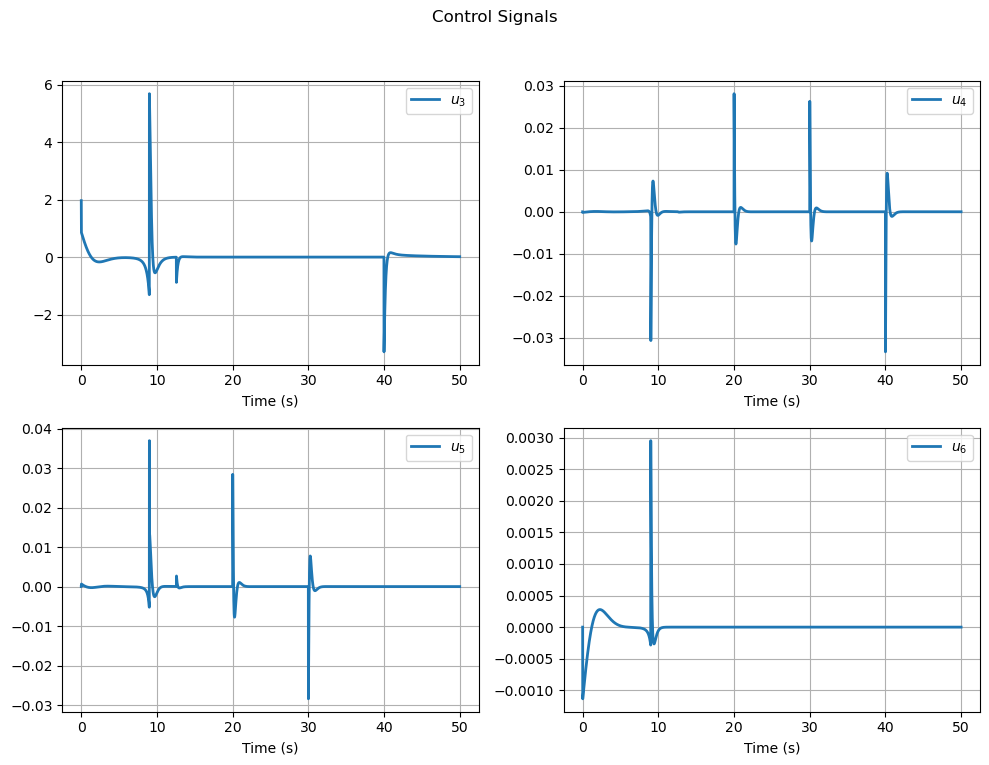

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D # Import Axes3D for 3D plotting

# Constants for the quadrotor (from Rotor2_Dynamic.m)
L = 0.47 / 2  # One-Half Length. Full Length equals 2*L = 47cm
m = 1  # Mass of the Quadrotor
g = 9.81
Ix = 0.0081  # X Axis Moment of Inertia
Iy = Ix  # Y Axis Moment of Inertia
Iz = 0.0142  # Z Axis MOMENT of Intertia
JTP = 10.4e-5
b = 5.42e-5  # Drag Force Coefficient
d = 1.1e-6  # Drag Torque Coefficient
Kf = 1e-6
Kt = 1.2e-6

def BackSteppingControl(t, tp, t0, wStar, x, XD, xDoubleDotD, FHAT_ST, gammaCtrl):
    """
    Backstepping control law for quadrotor.
    """
    FHAT_X = FHAT_ST[0]
    FHAT_Y = FHAT_ST[1]
    FHAT_Z = FHAT_ST[2]
    FHAT_PHI = FHAT_ST[3]
    FHAT_THETA = FHAT_ST[4]
    FHAT_PSI = FHAT_ST[5]

    xDot = x[1]
    yDot = x[3]
    zDot = x[5]
    phiDot = x[7]
    thetaDot = x[9]
    psiDot = x[11]

    e = x - XD

    xDoubleDotd = xDoubleDotD[0]
    yDoubleDotd = xDoubleDotD[1]
    zDoubleDotd = xDoubleDotD[2]
    phiDoubleDotd = xDoubleDotD[3]
    thetaDoubleDotd = xDoubleDotD[4]
    psiDoubleDotd = xDoubleDotD[5]

    # Alpha values
    alpha1 = -gammaCtrl[0] * e[0] / (tp + t0 - t)
    alpha2 = -gammaCtrl[2] * e[2] / (tp + t0 - t)
    alpha3 = -gammaCtrl[4] * e[4] / (tp + t0 - t)
    alpha4 = -gammaCtrl[6] * e[6] / (tp + t0 - t)
    alpha5 = -gammaCtrl[8] * e[8] / (tp + t0 - t)
    alpha6 = -gammaCtrl[10] * e[10] / (tp + t0 - t)

    # eDot values
    eDot1 = e[1] + alpha1
    eDot3 = e[3] + alpha2
    eDot5 = e[5] + alpha3
    eDot7 = e[7] + alpha4
    eDot9 = e[9] + alpha5
    eDot11 = e[11] + alpha6

    # AlphaDot values
    alphaDot1 = (-gammaCtrl[0] * eDot1 * (tp + t0 - t) - gammaCtrl[0] * e[0]) / (tp + t0 - t)**2
    alphaDot2 = (-gammaCtrl[2] * eDot3 * (tp + t0 - t) - gammaCtrl[2] * e[2]) / (tp + t0 - t)**2
    alphaDot3 = (-gammaCtrl[4] * eDot5 * (tp + t0 - t) - gammaCtrl[4] * e[5]) / (tp + t0 - t)**2
    alphaDot4 = (-gammaCtrl[6] * eDot7 * (tp + t0 - t) - gammaCtrl[6] * e[6]) / (tp + t0 - t)**2
    alphaDot5 = (-gammaCtrl[8] * eDot9 * (tp + t0 - t) - gammaCtrl[8] * e[8]) / (tp + t0 - t)**2
    alphaDot6 = (-gammaCtrl[10] * eDot11 * (tp + t0 - t) - gammaCtrl[10] * e[10]) / (tp + t0 - t)**2

    # BackStepping Position Control
    ux = -e[0] + (Kf / m) * xDot - FHAT_X + alphaDot1 + xDoubleDotd - gammaCtrl[1] * e[1] / (tp + t0 - t)
    uy = -e[2] + (Kf / m) * yDot - FHAT_Y + alphaDot2 + yDoubleDotd - gammaCtrl[3] * e[3] / (tp + t0 - t)
    uz = -e[4] + (Kf / m) * zDot - FHAT_Z + alphaDot3 + zDoubleDotd - gammaCtrl[5] * e[5] / (tp + t0 - t)

    # BackStepping Attitude Control
    uPhi = Ix * (-e[6] - ((Iy - Iz) / Ix) * thetaDot * psiDot -
                 JTP * thetaDot * wStar / Ix + Kt * L * phiDot / Ix + alphaDot4 +
                 phiDoubleDotd - FHAT_PHI - gammaCtrl[7] * e[7] / (tp + t0 - t))

    uTheta = Iy * (-e[8] - ((Iz - Ix) / Iy) * phiDot * psiDot +
                    JTP * phiDot * wStar / Iy + Kt * L * thetaDot / Iy + alphaDot5 +
                    thetaDoubleDotd - FHAT_THETA - gammaCtrl[9] * e[9] / (tp + t0 - t))

    uPsi = Iz * (-e[10] - ((Ix - Iy) / Iz) * thetaDot * phiDot +
                  Kt * L * psiDot / Iz + alphaDot6 +
                  psiDoubleDotd - FHAT_PSI - gammaCtrl[11] * e[11] / (tp + t0 - t))

    u = np.array([ux, uy, uz, uPhi, uTheta, uPsi])
    return u, e

def PIDController(x, xOld, xd, xdOld, Ts, INTEGRALOLD, Kp, Kd, Ki):
    """
    PID controller for quadrotor.
    """
    ex = xd[0] - x[0]
    ey = xd[2] - x[2]
    ez = xd[4] - x[4]

    ephi = xd[6] - x[6]
    etheta = xd[8] - x[8]
    epsi = xd[10] - x[10]

    exOld = xdOld[0] - xOld[0]
    eyOld = xdOld[2] - xOld[2]
    ezOld = xdOld[4] - xOld[4]

    ephiOld = xdOld[6] - xOld[6]
    ethetaOld = xdOld[8] - xOld[8]
    epsiOld = xdOld[10] - xOld[10]

    eDotx = (ex - exOld) / Ts
    eDoty = (ey - eyOld) / Ts
    eDotz = (ez - ezOld) / Ts

    eDotPhi = (ephi - ephiOld) / Ts
    eDotTheta = (etheta - ethetaOld) / Ts
    eDotPsi = (epsi - epsiOld) / Ts

    eNew = np.array([ex, eDotx, ey, eDoty, ez, eDotz,
                     ephi, eDotPhi, etheta, eDotTheta, epsi, eDotPsi])

    INTEGRALNEWX = INTEGRALOLD[0] + Ts * ex
    INTEGRALNEWY = INTEGRALOLD[1] + Ts * ey
    INTEGRALNEWZ = INTEGRALOLD[2] + Ts * ez
    INTEGRALNEWPHI = INTEGRALOLD[3] + Ts * ephi
    INTEGRALNEWTHETA = INTEGRALOLD[4] + Ts * etheta
    INTEGRALNEWPSI = INTEGRALOLD[5] + Ts * epsi

    ux = Kp[0] * ex + Kd[0] * eDotx + Ki[0] * INTEGRALNEWX
    uy = Kp[1] * ey + Kd[1] * eDoty + Ki[1] * INTEGRALNEWY
    uz = Kp[2] * ez + Kd[2] * eDotz + Ki[2] * INTEGRALNEWZ
    uPhi = Kp[3] * ephi + Kd[3] * eDotPhi + Ki[3] * INTEGRALNEWPHI
    uTheta = Kp[4] * etheta + Kd[4] * eDotTheta + Ki[4] * INTEGRALNEWTHETA
    uPsi = Kp[5] * epsi + Kd[5] * eDotPsi + Ki[5] * INTEGRALNEWPSI

    INTNEW = np.array([INTEGRALNEWX, INTEGRALNEWY, INTEGRALNEWZ,
                       INTEGRALNEWPHI, INTEGRALNEWTHETA, INTEGRALNEWPSI])

    u = np.array([ux, uy, uz, uPhi, uTheta, uPsi])
    SUM_Fi = m * np.sqrt(u[0]**2 + u[1]**2 + (g + u[2])**2)

    return u, SUM_Fi, INTNEW, eNew

def PlotEstimationResultsOfFaults(t, MainFaults, EstimatedFaults):
    """
    Plots the main faults, estimated faults, and estimation errors.
    """
    n = 6
    FaultName = ['u_{fx}', 'u_{fy}', 'u_{fz}', 'u_{f\\phi}', 'u_{f\\theta}', 'u_{f\\psi}']
    EstimatedFaultName = ['\\hat{u}_{f_x}', '\\hat{u}_{f_y}', '\\hat{u}_{f_z}',
                          '\\hat{u}_{f_{\\phi}}', '\\hat{u}_{f_{\\theta}}', '\\hat{u}_{f_{\\psi}}']
    ErrorName = ['e_{f_x}', 'e_{f_y}', 'e_{f_z}',
                 'e_{f_\\phi}', 'e_{f_\\theta}', 'e_{f_\\psi}']

    EstimationError = MainFaults - EstimatedFaults

    plt.figure(figsize=(12, 8))
    for i in range(n):
        plt.subplot(3, 2, i + 1)
        plt.plot(t, MainFaults[i, :], linewidth=2, label=f'${FaultName[i]}$')
        plt.plot(t, EstimatedFaults[i, :], '--', linewidth=2, label=f'${EstimatedFaultName[i]}$')
        plt.grid(True)
        plt.xlabel('Time (s)')
        plt.legend()
    plt.suptitle('Faults and Estimated Faults')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    plt.figure(figsize=(12, 8))
    for i in range(n):
        plt.subplot(3, 2, i + 1)
        plt.plot(t, EstimationError[i, :], '-.', linewidth=2.4, label=f'${ErrorName[i]}$')
        plt.grid(True)
        plt.xlabel('Time (s)')
        plt.legend()
    plt.suptitle('Fault Estimation Errors')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def plotResults(t, x, Xd, u):
    """
    Plots the quadrotor states, desired trajectory, 3D trajectory, and tracking errors.
    """
    # Plotting States (Position)
    plt.figure(figsize=(10, 8))
    Name = ['x', 'y', 'z']
    NameReference = ['x_d', 'y_d', 'z_d']
    for i in range(3):
        plt.subplot(3, 1, i + 1)
        plt.plot(t, x[2 * i, :], 'r', linewidth=2, label=f'${Name[i]}$')
        plt.plot(t, Xd[2 * i, :], 'k--', linewidth=1.45, label=f'${NameReference[i]}$')
        plt.grid(True)
        plt.xlabel('Time (s)')
        plt.legend(loc='upper right')
        plt.ylabel(f'${Name[i]}$')
    plt.suptitle('Quadrotor Position States')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # Plotting States (Orientation)
    plt.figure(figsize=(10, 8))
    Name = ['\\phi', '\\theta', '\\psi']
    NameReference = ['\\phi_d', '\\theta_d', '\\psi_d']
    for i in range(3):
        plt.subplot(3, 1, i + 1)
        plt.plot(t, np.degrees(x[2 * i + 6, :]), 'r', linewidth=2, label=f'${Name[i]}$')
        plt.plot(t, np.degrees(Xd[2 * i + 6, :]), 'k--', linewidth=1.45, label=f'${NameReference[i]}$')
        plt.grid(True)
        plt.xlabel('Time (s)')
        plt.legend(loc='upper right')
        plt.ylabel(f'${Name[i]}$ (Degree)')
    plt.suptitle('Quadrotor Orientation States')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # Desired 3D Trajectory
    fig5 = plt.figure(figsize=(8, 8))
    ax = fig5.add_subplot(111, projection='3d') # Explicitly create a 3D subplot
    ax.plot(x[0, :], x[2, :], x[4, :], 'r--', linewidth=2.25, label='X')
    ax.plot(Xd[0, :], Xd[2, :], Xd[4, :], 'b', linewidth=1.5, label='X_{desired}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z') # Now set_zlabel will work
    ax.set_title('3D Trajectory of the Quadrotor')
    ax.grid(True)
    ax.legend()
    plt.show()

    # Tracking Error
    plt.figure(figsize=(12, 8))
    Name_e = ['e_x', 'e_y', 'e_z', 'e_{\\phi}', 'e_{\\theta}', 'e_{\\psi}']
    for i in range(6):
        plt.subplot(3, 2, i + 1)
        random_color = np.random.rand(3)
        plt.plot(t, x[2 * i, :] - Xd[2 * i, :], linewidth=2, color=random_color, label=f'${Name_e[i]}$')
        plt.xlabel('Time (s)')
        plt.legend()
        plt.grid(True)
    plt.suptitle('Tracking Errors')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # Control Signals (u3, u4, u5, u6)
    plt.figure(figsize=(10, 8))
    nameU = ['u_3', 'u_4', 'u_5', 'u_6']
    for jj in range(4):
        plt.subplot(2, 2, jj + 1)
        plt.plot(t, u[jj + 2, :], linewidth=2, label=f'${nameU[jj]}$')
        plt.grid(True)
        plt.xlabel('Time (s)')
        plt.legend()
    plt.suptitle('Control Signals')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



def Rotor2_Dynamic(t, x, u, FAULT_ANGLES):
    """
    Calculates the quadrotor dynamics.
    """
    AlphaAngle = FAULT_ANGLES[0]
    BetaAngle = FAULT_ANGLES[1]
    GammaAngle = FAULT_ANGLES[2]

    # Control Part
    Transform_Matrix = np.array([[b, b, b, b],
                                 [0, -b * L, 0, b * L],
                                 [-b * L, 0, b * L, 0],
                                 [d, -d, d, -d]])

    # Ensure u has 6 elements for proper indexing
    if len(u) < 6:
        raise ValueError("Control input 'u' must have at least 6 elements.")

    # Calculate uThrust based on the first three control inputs (forces)
    uThrust = m * np.sqrt(u[0]**2 + u[1]**2 + (g + u[2])**2)
    Sol_Vector = np.array([uThrust, u[3], u[4], u[5]])  # [Uz, Uphi, Utheta, Upsi]'

    # Solve for squared angular velocities
    try:
        Squared_W = np.linalg.solve(Transform_Matrix, Sol_Vector)
    except np.linalg.LinAlgError:
        # Handle singular matrix case, e.g., return zeros or raise an error
        print("Warning: Singular matrix in Rotor2_Dynamic. Returning zeros for W and wStar.")
        return np.zeros(12), np.zeros(6), 0, np.zeros(4), 0, 0, 0 # Return appropriate defaults
        
    w1s, w2s, w3s, w4s = Squared_W

    # Ensure non-negative values before taking square root
    W = np.sqrt(np.maximum(0, Squared_W))
    w1, w2, w3, w4 = W

    w2_2 = w2s # This seems to be the squared value of w2 from the MATLAB code

    # State Vector
    phi = x[6]
    theta = x[8]
    say = x[10]

    xDot = x[1]
    yDot = x[3]
    zDot = x[5]

    phiDot = x[7]
    thetaDot = x[9]
    sayDot = x[11]

    wStar = (w1 + w3 - w2 - w4)

    # Fault Injection
    c = np.cos
    s = np.sin

    f1 = s(AlphaAngle) * s(GammaAngle)
    f2 = -c(GammaAngle) * s(BetaAngle) + s(GammaAngle) * c(BetaAngle) * c(AlphaAngle)
    f3 = c(BetaAngle) * c(GammaAngle) + c(AlphaAngle) * s(BetaAngle) * s(GammaAngle) - 1
    f4 = f2 * s(BetaAngle) - (1 + f3) * c(BetaAngle) + 1
    f5 = f1 * s(BetaAngle)
    f6 = f1 * c(BetaAngle)

    ufx = (b / m) * w2_2 * (+f1 * (c(theta) * c(say)) + f2 * (c(say) * s(phi) * s(theta) - c(phi) * s(say)) + f3 * (s(phi) * s(say) + c(phi) * c(say) * s(theta)))
    ufy = (b / m) * w2_2 * (+f1 * (c(theta) * s(say)) + f2 * (c(phi) * c(say) + s(phi) * s(theta) * s(say)) + f3 * (-c(say) * s(phi) + c(phi) * s(say) * s(theta)))
    ufz = (b / m) * w2_2 * (-f1 * s(theta) + f2 * c(theta) * s(phi) + f3 * c(phi) * c(theta))

    ufPhi = (JTP * w2 / Ix) * (sayDot * f2 - f3 * thetaDot) + (1 / Ix) * w2_2 * (b * L * f4 + f1 * d)
    ufTheta = (JTP / Iy) * w2 * (sayDot * f1 + f3 * phiDot) + (1 / Iy) * (w2_2) * (-f2 * d + L * b * f5)
    ufSay = (JTP * w2) / Iz * (-f1 * thetaDot - f2 * phiDot) + (1 / Iz) * (w2_2) * (-f3 * d - f6 * L * b)

    Disturbance = np.array([ufx, ufy, ufz, ufPhi, ufTheta, ufSay])

    # State Space
    xDoubleDot = u[0] - Kf * xDot / m + Disturbance[0]
    yDoubleDot = u[1] - Kf * yDot / m + Disturbance[1]
    zDoubleDot = u[2] - Kf * zDot / m + Disturbance[2]

    fPhi = ((Iy - Iz) / Ix) * thetaDot * sayDot + JTP * thetaDot * wStar / Ix - Kt * L * phiDot / Ix
    fTheta = ((Iz - Ix) / Iy) * phiDot * sayDot - JTP * phiDot * wStar / Iy - (Kt * L / Iy) * thetaDot
    fPsi = ((Ix - Iy) / Iz) * phiDot * thetaDot - (Kt * L / Iz) * sayDot

    phiDoubleDot = fPhi + Disturbance[3] + u[3] / Ix
    thetaDoubleDot = fTheta + u[4] / Iy + Disturbance[4]
    psiDoubleDot = fPsi + u[5] / Iz + Disturbance[5]

    XDOT = np.array([xDot, xDoubleDot,
                     yDot, yDoubleDot,
                     zDot, zDoubleDot,
                     phiDot, phiDoubleDot,
                     thetaDot, thetaDoubleDot,
                     sayDot, psiDoubleDot])

    return XDOT, Disturbance, wStar, W, fPhi, fTheta, fPsi

def setDesiredTrajectory(t_array, CASE, n=6):
    """
    Generates desired trajectories for the quadrotor.
    """
    if CASE is None or CASE <= 0 or CASE > 3:
        CASE = 1

    xd = np.zeros_like(t_array, dtype=float)
    yd = np.zeros_like(t_array, dtype=float)
    zd = np.zeros_like(t_array, dtype=float)
    psid = np.zeros_like(t_array, dtype=float)
    phid = np.zeros_like(t_array, dtype=float)
    thetad = np.zeros_like(t_array, dtype=float)

    xDotDesired = np.zeros_like(t_array, dtype=float)
    yDotDesired = np.zeros_like(t_array, dtype=float)
    zDotDesired = np.zeros_like(t_array, dtype=float)
    phiDotDesired = np.zeros_like(t_array, dtype=float)
    thetaDotDesired = np.zeros_like(t_array, dtype=float)
    sayDotDesired = np.zeros_like(t_array, dtype=float)

    xDOUBLEDOTDESIRED = np.zeros_like(t_array, dtype=float)
    yDOUBLEDOTDESIRED = np.zeros_like(t_array, dtype=float)
    zDOUBLEDOTDESIRED = np.zeros_like(t_array, dtype=float)
    phiDoubleDotDesired = np.zeros_like(t_array, dtype=float)
    thetaDoubleDotDesired = np.zeros_like(t_array, dtype=float)
    sayDoubleDotDesired = np.zeros_like(t_array, dtype=float)

    if CASE == 1:
        # First Trajectory (Linear)
        for i, t_val in enumerate(t_array):
            if t_val <= 10:
                xd[i] = 2
            elif 10 < t_val < 30:
                xd[i] = 1
            else:
                xd[i] = 2

            if t_val <= 20:
                yd[i] = 2
            elif 20 < t_val <= 40:
                yd[i] = 1
            else:
                yd[i] = 2

            if t_val <= 50:
                zd[i] = 2
            else:
                zd[i] = 0 # This condition seems to be unreachable if tMax is 50

            if t_val <= 50:
                psid[i] = 0.5
            else:
                psid[i] = 0 # This condition seems to be unreachable if tMax is 50

        XD = np.vstack([xd, np.zeros_like(t_array),
                        yd, np.zeros_like(t_array),
                        zd, np.zeros_like(t_array),
                        phid, np.zeros_like(t_array),
                        thetad, np.zeros_like(t_array),
                        psid, np.zeros_like(t_array)])
        XDoubleDotD = np.zeros((n, len(t_array)))

    elif CASE == 2:
        # Second Trajectory (Elliptical)
        for i, t_val in enumerate(t_array):
            xd[i] = 0.5 * np.cos(np.pi * t_val / 20)
            yd[i] = 0.5 * np.sin(np.pi * t_val / 20)
            zd[i] = 2 - 0.5 * np.cos(np.pi * t_val / 20)

            xDotDesired[i] = -0.5 * np.pi / 20 * np.sin(np.pi * t_val / 20)
            yDotDesired[i] = 0.5 * np.pi / 20 * np.cos(np.pi * t_val / 20)
            zDotDesired[i] = 0.5 * np.pi / 20 * np.sin(np.pi * t_val / 20)

            xDOUBLEDOTDESIRED[i] = -(0.5 * np.pi / 20)**2 * np.cos(np.pi * t_val / 20)
            yDOUBLEDOTDESIRED[i] = -(0.5 * np.pi / 20)**2 * np.sin(np.pi * t_val / 20)
            zDOUBLEDOTDESIRED[i] = +(0.5 * np.pi / 20)**2 * np.cos(np.pi * t_val / 20)

        XD = np.vstack([xd, xDotDesired,
                        yd, yDotDesired,
                        zd, zDotDesired,
                        phid, phiDotDesired,
                        thetad, thetaDotDesired,
                        psid, sayDotDesired])

        XDoubleDotD = np.vstack([xDOUBLEDOTDESIRED,
                                 yDOUBLEDOTDESIRED,
                                 zDOUBLEDOTDESIRED,
                                 phiDoubleDotDesired,
                                 thetaDoubleDotDesired,
                                 sayDoubleDotDesired])

    elif CASE == 3:
        # Third Trajectory (BiLinear)
        for i, t_val in enumerate(t_array):
            if t_val <= 4 * np.pi:
                xd[i] = 0.5 * np.cos(t_val / 2)
            elif 4 * np.pi < t_val < 20:
                xd[i] = 0.5
            elif 20 <= t_val < 30:
                xd[i] = (0.25 * t_val - 4.5)
            else:
                xd[i] = 3

            if t_val <= 4 * np.pi:
                yd[i] = 0.5 * np.sin(t_val / 2)
            elif 4 * np.pi < t_val < 20:
                yd[i] = (0.25 * t_val - np.pi)
            elif 20 <= t_val < 30:
                yd[i] = (5 - np.pi)
            elif 30 <= t_val < 40:
                yd[i] = (-0.2358 * t_val + 8.94)
            else:
                yd[i] = -0.5

            if t_val < 4 * np.pi:
                zd[i] = (0.125 * t_val + 1)
            elif 4 * np.pi <= t_val < 40:
                zd[i] = (0.5 * np.pi + 1)
            else:
                zd[i] = np.exp(-0.2 * t_val + 8.944)

            # Derivatives
            if t_val <= 4 * np.pi:
                xDotDesired[i] = -0.25 * np.sin(t_val / 2)
            elif 4 * np.pi < t_val < 20:
                xDotDesired[i] = 0
            elif 20 <= t_val < 30:
                xDotDesired[i] = 0.25
            else:
                xDotDesired[i] = 0

            if t_val <= 4 * np.pi:
                yDotDesired[i] = 0.25 * np.cos(t_val / 2)
            elif 4 * np.pi < t_val < 20:
                yDotDesired[i] = 0.25
            elif 20 <= t_val < 30:
                yDotDesired[i] = 0
            elif 30 <= t_val < 40:
                yDotDesired[i] = -0.2358
            else:
                yDotDesired[i] = 0

            if t_val < 4 * np.pi:
                zDotDesired[i] = 0.125
            elif 4 * np.pi <= t_val < 40:
                zDotDesired[i] = 0
            else:
                zDotDesired[i] = -0.2 * np.exp(-0.2 * t_val + 8.944)

            # Second Derivatives
            if t_val <= 4 * np.pi:
                xDOUBLEDOTDESIRED[i] = -0.125 * np.cos(t_val / 2)
            elif 4 * np.pi < t_val < 20:
                xDOUBLEDOTDESIRED[i] = 0
            elif 20 <= t_val < 30:
                xDOUBLEDOTDESIRED[i] = 0
            else:
                xDOUBLEDOTDESIRED[i] = 0

            if t_val <= 4 * np.pi:
                yDOUBLEDOTDESIRED[i] = -0.125 * np.sin(t_val / 2)
            elif 4 * np.pi < t_val < 20:
                yDOUBLEDOTDESIRED[i] = 0
            elif 20 <= t_val < 30:
                yDOUBLEDOTDESIRED[i] = 0
            elif 30 <= t_val < 40:
                yDOUBLEDOTDESIRED[i] = 0
            else:
                yDOUBLEDOTDESIRED[i] = 0

            if t_val < 4 * np.pi:
                zDOUBLEDOTDESIRED[i] = 0
            elif 4 * np.pi <= t_val < 40:
                zDOUBLEDOTDESIRED[i] = 0
            else:
                zDOUBLEDOTDESIRED[i] = 0.04 * np.exp(-0.2 * t_val + 8.944)

        XD = np.vstack([xd, xDotDesired,
                        yd, yDotDesired,
                        zd, zDotDesired,
                        phid, phiDotDesired,
                        thetad, thetaDotDesired,
                        psid, sayDotDesired])

        XDoubleDotD = np.vstack([xDOUBLEDOTDESIRED,
                                 yDOUBLEDOTDESIRED,
                                 zDOUBLEDOTDESIRED,
                                 phiDoubleDotDesired,
                                 thetaDoubleDotDesired,
                                 sayDoubleDotDesired])

    return XD, XDoubleDotD

def SlidingModeControl(x, XD, xDoubleDotd, K, a, fPhi, fTheta, fPsi):
    """
    Sliding Mode Control law for quadrotor.
    """
    e = x - XD

    S = np.array([a[0] * e[0] + e[1],
                  a[1] * e[2] + e[3],
                  a[2] * e[4] + e[5],
                  a[3] * e[6] + e[7],
                  a[4] * e[8] + e[9],
                  a[5] * e[10] + e[11]])

    # Altitude Control
    ux = -a[0] * e[1] + xDoubleDotd[0] + Kf * x[1] / m - K[0] * np.tanh(S[0])
    uy = -a[1] * e[3] + xDoubleDotd[1] + Kf * x[3] / m - K[1] * np.tanh(S[1])
    uz = -a[2] * e[5] + xDoubleDotd[2] + Kf * x[5] / m - K[2] * np.tanh(S[2])

    # Attitude Control
    uPhi = (-Ix) * (fPhi + a[3] * e[7] + K[3] * np.tanh(S[3]))
    uTheta = (-Iy) * (fTheta + a[4] * e[9] + K[4] * np.tanh(S[4]))
    uPsi = (-Iz) * (a[5] * e[11] + fPsi + K[5] * np.tanh(S[5]))

    u = np.array([ux, uy, uz, uPhi, uTheta, uPsi])
    return u, e

def stateCalculation(K1RK, xOld, uold, Ts, tOld, FAULT_ANGLES):
    """
    Performs one step of Runge-Kutta 4th order integration.
    """
    # Rotor2_Dynamic returns multiple outputs, we only need the first one (XDOT) for K2RK, K3RK, K4RK
    K2RK, _, _, _, _, _, _ = Rotor2_Dynamic(tOld + Ts / 2, xOld + Ts * K1RK / 2, uold, FAULT_ANGLES)
    K3RK, _, _, _, _, _, _ = Rotor2_Dynamic(tOld + Ts / 2, xOld + Ts * K2RK / 2, uold, FAULT_ANGLES)
    K4RK, _, _, _, _, _, _ = Rotor2_Dynamic(tOld + Ts, xOld + Ts * K3RK, uold, FAULT_ANGLES)

    Q = xOld + (Ts / 6) * (K1RK + 2 * K2RK + 2 * K3RK + K4RK)
    return Q

def main():
    """
    Main script to simulate quadrotor control.
    """
    # FAULT ANGLES
    T = np.pi / 180  # Conversion to Radians
    ALPHA = 0 * T
    GAMMA = 0 * T
    BETA = 0 * T
    FAULT_ANGLES = np.array([ALPHA, BETA, GAMMA])

    # Initialization
    Ts = 0.01  # Must be 0.0001, at least, to be Fully Robust.
    tMax = 50
    t0 = 0
    t = np.arange(t0, tMax + Ts, Ts)
    tp = 10  # SMC Parameters should be changed according to this value (After Tp)
    N = len(t)
    n = 6  # Number of DOF (X)

    x0 = np.array([-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0], dtype=float)  # Ics
    x = np.zeros((2 * n, N), dtype=float)  # Complete State Vector
    x[:, 0] = x0

    # Backstepping Parameters, Gammai > 1
    GammaPosition = 5 * np.ones(n)
    GammaOrientation = 5 * np.ones(n)
    gammaCtrl = np.concatenate((GammaPosition, GammaOrientation))

  

    nKernel = 10  # Number of Kernel Functions
    BIJ = np.diag([0.01, 0.01, 0.01, 0.01, 0.01, 0.01])
    CIJ = np.diag([0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

    bij = np.zeros((n, nKernel))
    cij = np.zeros((n, nKernel))

    for i in range(n):
        bij[i, :] = BIJ[i, i]
        cij[i, :] = CIJ[i, i]

    # Reference Signals
    CASE = 3  # 1: Linear Trajectory, 2: Elliptical Trajectory, 3: BiLinear Trajectory
    XD, XDoubleDotD = setDesiredTrajectory(t, CASE, n)
    sayd = XD[10, :]  # Note: Python uses 0-based indexing, so 11th element is index 10

    # Error Dynamics
    e = np.zeros((2 * n, N))

    # Control Signal Initialization
    nU = 6
    u = np.zeros((nU, N))
    u[2, 0] = 0.2 * m * g  # u(3,1) in MATLAB is u[2,0] in Python
    W = 100 * np.ones((4, N))

    # Fault Estimation Initialization
    FaultHat = 0.01 * np.zeros((n, N))
    wHatX = 0.01 * np.ones((nKernel, N))
    wHatY = 0.01 * np.ones((nKernel, N))
    wHatZ = 0.01 * np.ones((nKernel, N))
    wHatPhi = 0.01 * np.ones((nKernel, N))
    wHatTheta = 0.01 * np.ones((nKernel, N))
    wHatPsi = 0.01 * np.ones((nKernel, N))

    # Fault Vectors
    MainFault = np.zeros((n, N))

    # PID Parameters Initialization for compersian 
    INT = np.zeros((n, N))
    Kp = np.array([1, 1, 1, 0.1, 0.1, 1])
    Kd = np.array([1, 1, 1, 0.1, 0.1, 1])
    Ki = np.array([0.1, 0.1, 0.1, 0.01, 0.01, 0.01])

    # SMC Parameters
    K = np.array([5, 5, 5, 5, 5, 5])
    a = np.array([2, 2, 2, 5, 5, 5])

    # Main Loop
    print("Starting simulation...")
    import time
    start_time = time.time()

    for i in range(1, N):
        # Rotor2_Dynamic returns multiple values. We need to unpack them.
        K1RK, MainFault[:, i], wStar, W[:, i], fPhi, fTheta, fPsi = \
            Rotor2_Dynamic(t[i - 1], x[:, i - 1], u[:, i - 1], FAULT_ANGLES)

        x[:, i] = stateCalculation(K1RK, x[:, i - 1], u[:, i - 1], Ts, t[i - 1], FAULT_ANGLES)

        # Virtual Control Design
        ux_val = u[0, i - 1]
        uy_val = u[1, i - 1]
        uz_val = u[2, i - 1]

        # Calculate desired theta and phi based on current control inputs
        # Ensure that the denominator (g + uz_val) is not zero or very close to zero
        # to avoid division by zero or large values.
        denominator_theta = (g + uz_val)
        if abs(denominator_theta) < 1e-6: # Check if close to zero
            thetad_val = np.arctan2((ux_val * np.cos(sayd[i]) + uy_val * np.sin(sayd[i])), np.sign(denominator_theta) * 1e-6) # Use a small value with the correct sign
        else:
            thetad_val = np.arctan((ux_val * np.cos(sayd[i]) + uy_val * np.sin(sayd[i])) / denominator_theta)

        # Ensure that the denominator (g + uz_val) is not zero or very close to zero
        # for phid_val calculation as well.
        denominator_phi = (g + uz_val)
        if abs(denominator_phi) < 1e-6: # Check if close to zero
            phid_val = np.arctan2(np.cos(thetad_val) * (ux_val * np.sin(sayd[i]) - uy_val * np.cos(sayd[i])), np.sign(denominator_phi) * 1e-6)
        else:
            phid_val = np.arctan(np.cos(thetad_val) * (ux_val * np.sin(sayd[i]) - uy_val * np.cos(sayd[i])) / denominator_phi)

        # Desired Roll/Pitch Angles
        XD[6, i] = phid_val  # XD(7,i) in MATLAB is XD[6,i] in Python
        XD[8, i] = thetad_val  # XD(9,i) in MATLAB is XD[8,i] in Python

        # Prescribed Backstepping Control or SMC
        if t[i] < tp - 1:
            u[:, i], e[:, i] = BackSteppingControl(t[i], tp, t0, wStar, x[:, i], XD[:, i],
                                                   XDoubleDotD[:, i], FaultHat[:, i - 1], gammaCtrl)
        else:
            # SMC (Sliding Mode Control)
            u[:, i], e[:, i] = SlidingModeControl(x[:, i], XD[:, i], XDoubleDotD[:, i], K,
                                                  a, fPhi, fTheta, fPsi)

    end_time = time.time()
    print(f"Simulation finished in {end_time - start_time:.2f} seconds.")

    # Plot Results
    plotResults(t, x, XD, u)


if __name__ == "__main__":
    main()
